# Customer Segmentation

In [1]:
import pandas as pd
pd.set_option('max_columns',None)

In [3]:
train_set = pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/Train_aBjfeNk.csv')
test_set = pd.read_csv('https://datahack-prod.s3.amazonaws.com/test_file/Test_LqhgPWU.csv')
sample_submissions = pd.read_csv('https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_wyi0h0z.csv')

In [6]:
train_set.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [8]:
test_set.head(2)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6


In [9]:
sample_submissions.head(2)

,ID,Segmentation
0,458989,A
1,458994,A


In [10]:
import os

os.mkdir('data')
train_set.to_csv('data/train_set.csv',index=False)
test_set.to_csv('data/test_set.csv',index=False)
sample_submissions.to_csv('data/sample_submissions.csv',index=False)

In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
ID                 8068 non-null int64
Gender             8068 non-null object
Ever_Married       7928 non-null object
Age                8068 non-null int64
Graduated          7990 non-null object
Profession         7944 non-null object
Work_Experience    7239 non-null float64
Spending_Score     8068 non-null object
Family_Size        7733 non-null float64
Var_1              7992 non-null object
Segmentation       8068 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [17]:
for dtype in ['object','int','float']:
    print(dtype,'-->',list(train_set.select_dtypes(dtype).columns))

object --> ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
int --> ['ID', 'Age']
float --> ['Work_Experience', 'Family_Size']


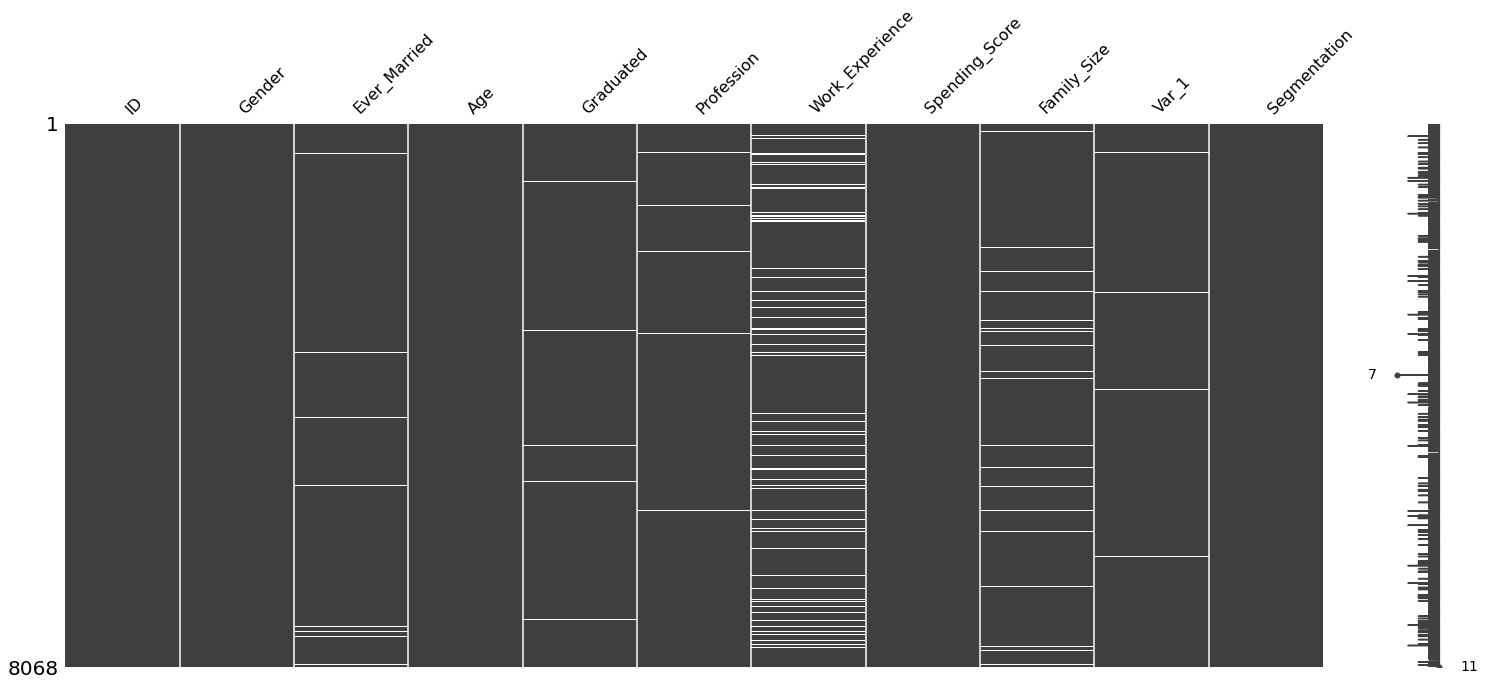

In [18]:
import missingno as msno
msno.matrix(train_set)

In [19]:
train_set.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [26]:
train_set.Gender.value_counts(dropna=False,normalize=True)*100

Male      54.747149
Female    45.252851
Name: Gender, dtype: float64

In [25]:
train_set.Ever_Married.value_counts(dropna=False,normalize=True)*100

Yes    57.548339
No     40.716411
NaN     1.735250
Name: Ever_Married, dtype: float64

In [29]:
train_set.Graduated.value_counts(dropna=False,normalize=True)*100

Yes    61.576599
No     37.456619
NaN     0.966782
Name: Graduated, dtype: float64

In [30]:
train_set.Profession.value_counts(dropna=False,normalize=True)*100

Artist           31.184928
Healthcare       16.509668
Entertainment    11.762519
Engineer          8.663857
Doctor            8.527516
Lawyer            7.721864
Executive         7.424393
Marketing         3.619236
Homemaker         3.049083
NaN               1.536936
Name: Profession, dtype: float64

In [31]:
train_set.Spending_Score.value_counts(dropna=False,normalize=True)*100

Low        60.461081
Average    24.467030
High       15.071889
Name: Spending_Score, dtype: float64

In [32]:
train_set.Var_1.value_counts(dropna=False,normalize=True)*100

Cat_6    64.923153
Cat_4    13.497769
Cat_3    10.188399
Cat_2     5.230540
Cat_7     2.516113
Cat_1     1.648488
Cat_5     1.053545
NaN       0.941993
Name: Var_1, dtype: float64

In [39]:
train_set.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,8068,NaN,NaN,NaN,463479,2595.38,458982,461241,463472,465744,467974
Gender,8068,2,Male,4417,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,7928,2,Yes,4643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,8068,NaN,NaN,NaN,43.4669,16.7117,18,30,40,53,89
Graduated,7990,2,Yes,4968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,7944,9,Artist,2516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,7239,NaN,NaN,NaN,2.64166,3.40676,0,0,1,4,14
Spending_Score,8068,3,Low,4878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,7733,NaN,NaN,NaN,2.85012,1.53141,1,2,3,4,9
Var_1,7992,7,Cat_6,5238,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# 1.53141*3
# 16.7117*3
3.40676*3

10.220279999999999

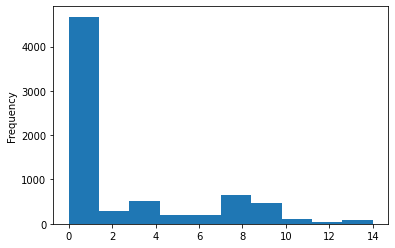

In [50]:
train_set.Work_Experience.plot.hist(bins=10)

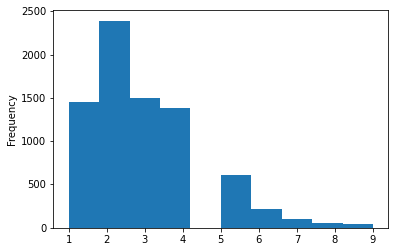

In [51]:
train_set.Family_Size.plot.hist(bins=10)

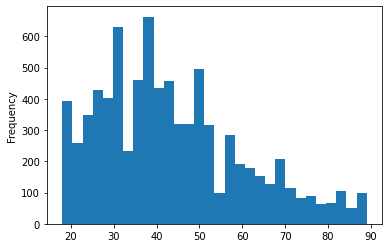

In [53]:
train_set.Age.plot.hist(bins=30)

In [33]:
train_set.head(1)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D


In [34]:
train_set.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [38]:
for col in ['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession','Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1']:
    print(col)
    print(train_set[train_set.Segmentation=='A'][col].value_counts(dropna=False,normalize=True).head(5))
    print('\n')
    

Gender
Male      0.539047
Female    0.460953
Name: Gender, dtype: float64


Ever_Married
Yes    0.576572
No     0.406187
NaN    0.017241
Name: Ever_Married, dtype: float64


Age
35    0.044118
43    0.043103
42    0.041075
37    0.040568
40    0.038540
Name: Age, dtype: float64


Graduated
Yes    0.618154
No     0.369675
NaN    0.012170
Name: Graduated, dtype: float64


Profession
Artist           0.282961
Entertainment    0.185091
Engineer         0.131339
Doctor           0.100913
Lawyer           0.099899
Name: Profession, dtype: float64


Work_Experience
1.0    0.293103
0.0    0.274848
NaN    0.098377
9.0    0.069980
8.0    0.061359
Name: Work_Experience, dtype: float64


Spending_Score
Low        0.688641
Average    0.173935
High       0.137424
Name: Spending_Score, dtype: float64


Family_Size
2.0    0.314909
1.0    0.284483
3.0    0.160243
4.0    0.111055
NaN    0.048174
Name: Family_Size, dtype: float64


Var_1
Cat_6    0.615112
Cat_4    0.168864
Cat_3    0.113083
Cat_2    0.04